In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm
import os
%matplotlib inline
sns.set(rc={'axes.facecolor':'#FFFFFF'})
sns.set_style('whitegrid')
pd.set_option('display.max_columns', 100)

In [2]:
data = {}
clean_data = {}

for f in os.listdir('/Users/katya/Lab/CRG/Research/HIS3InterspeciesEpistasis/Data/'):
    if 'csv' in f:
        data[f[:-16]] = pd.DataFrame.from_csv('/Users/katya/Lab/CRG/Research/HIS3InterspeciesEpistasis/Data/' + f, sep = '\t')
        clean_data[f[:-16]] = data[f[:-16]][(data[f[:-16]].nonsense == 0) & (data[f[:-16]].middle == 1)]

In [11]:
chunks = [('S'+str(x)) for x in range(1,13)]

singles = {}
doubles = {}

for chunk in chunks:
    singles[chunk] = clean_data[chunk][clean_data[chunk].mut_list.str.count(':') == 0]
    singles[chunk] = pd.DataFrame([singles[chunk].s, singles[chunk].mut_list]).transpose()
    
    doubles[chunk] = clean_data[chunk][clean_data[chunk].mut_list.str.count(':') == 1]
    doubles[chunk] = pd.DataFrame([doubles[chunk].s, doubles[chunk].mut_list]).transpose()

# Singles as singles and as doubles

In [20]:
x = {}
y = {}

for chunk in chunks:
    x[chunk] = []
    y[chunk] = []
    for i in range(len(singles[chunk])):
        for j in range(len(doubles[chunk])):
            if singles[chunk].mut_list[i] in doubles[chunk].mut_list[j]:
                x[chunk].append(singles[chunk].s[i])
                y[chunk].append(doubles[chunk].s[j])

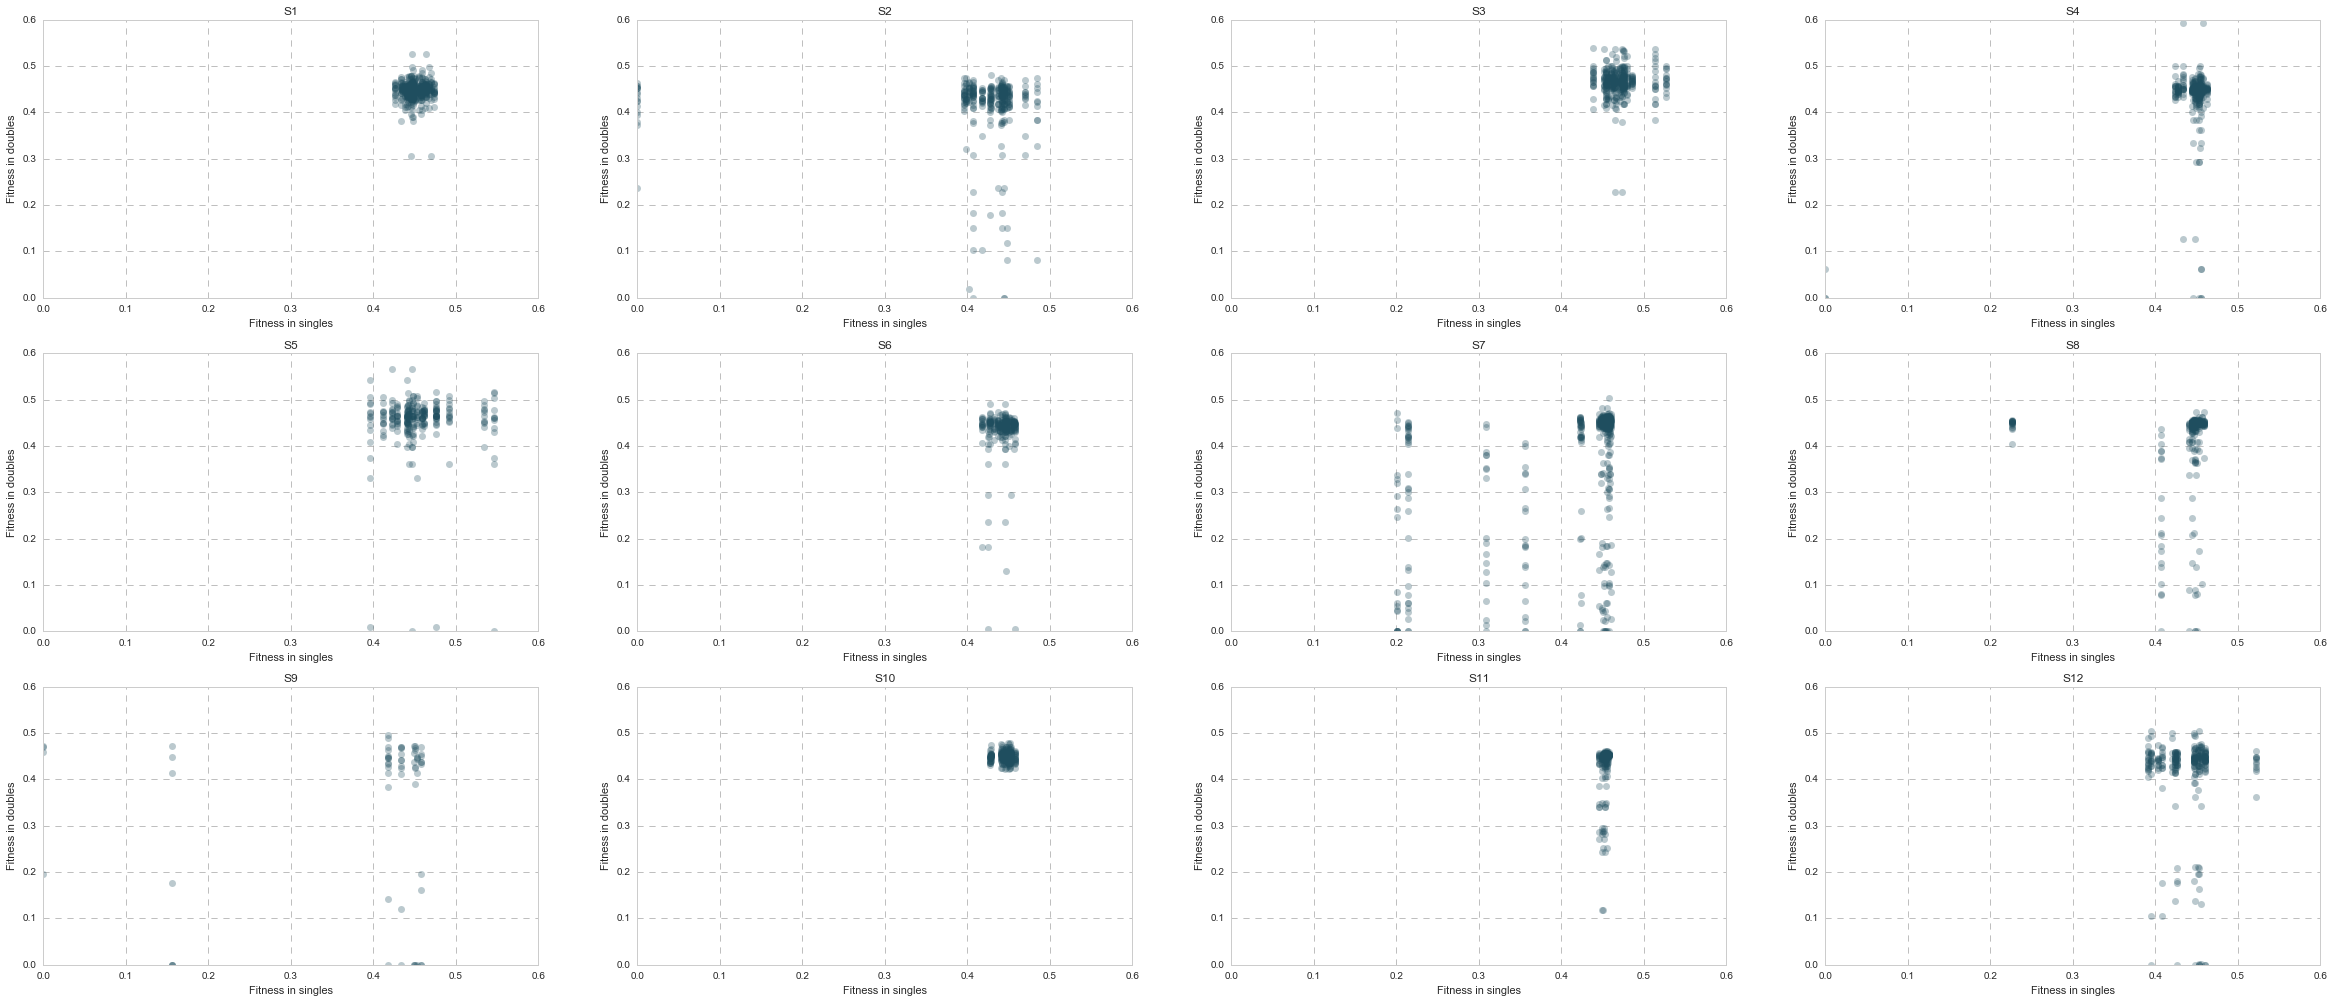

In [28]:
plt.figure(figsize=(4*5+3,3*5))
count=1
for chunk in chunks:
    plt.subplot(3,4,count)
    plt.subplots_adjust(top = 1,right=1.5)
    plt.title(chunk)
    plt.plot(x[chunk], y[chunk], 'o', alpha=0.3, c='#1F4E5F')
    plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
    plt.xlabel('Fitness in singles')
    plt.ylabel('Fitness in doubles')
    plt.xlim(0,0.6)
    plt.ylim(0,0.6)
    count+=1

# Epistasis

In [37]:
x = {}
y = {}

for chunk in chunks:
    x[chunk] = []
    y[chunk] = []
    maxNegMutEff = min(clean_data[chunk].s) - 0.45
    
    for i1 in range(len(singles[chunk])):
        mut1 = singles[chunk].mut_list[i1]
        delta_fit1 = singles[chunk].s[i1] - 0.45
        for i2 in range(len(singles[chunk])):
            mut2 = singles[chunk].mut_list[i2]
            delta_fit2 = singles[chunk].s[i2] - 0.45
            for j in range(len(doubles[chunk])):
                if (mut1+':'+mut2) == doubles[chunk].mut_list[j]:
                    x[chunk].append(max((delta_fit1 + delta_fit2), maxNegMutEff))
                    y[chunk].append(doubles[chunk].s[j] - 0.45)

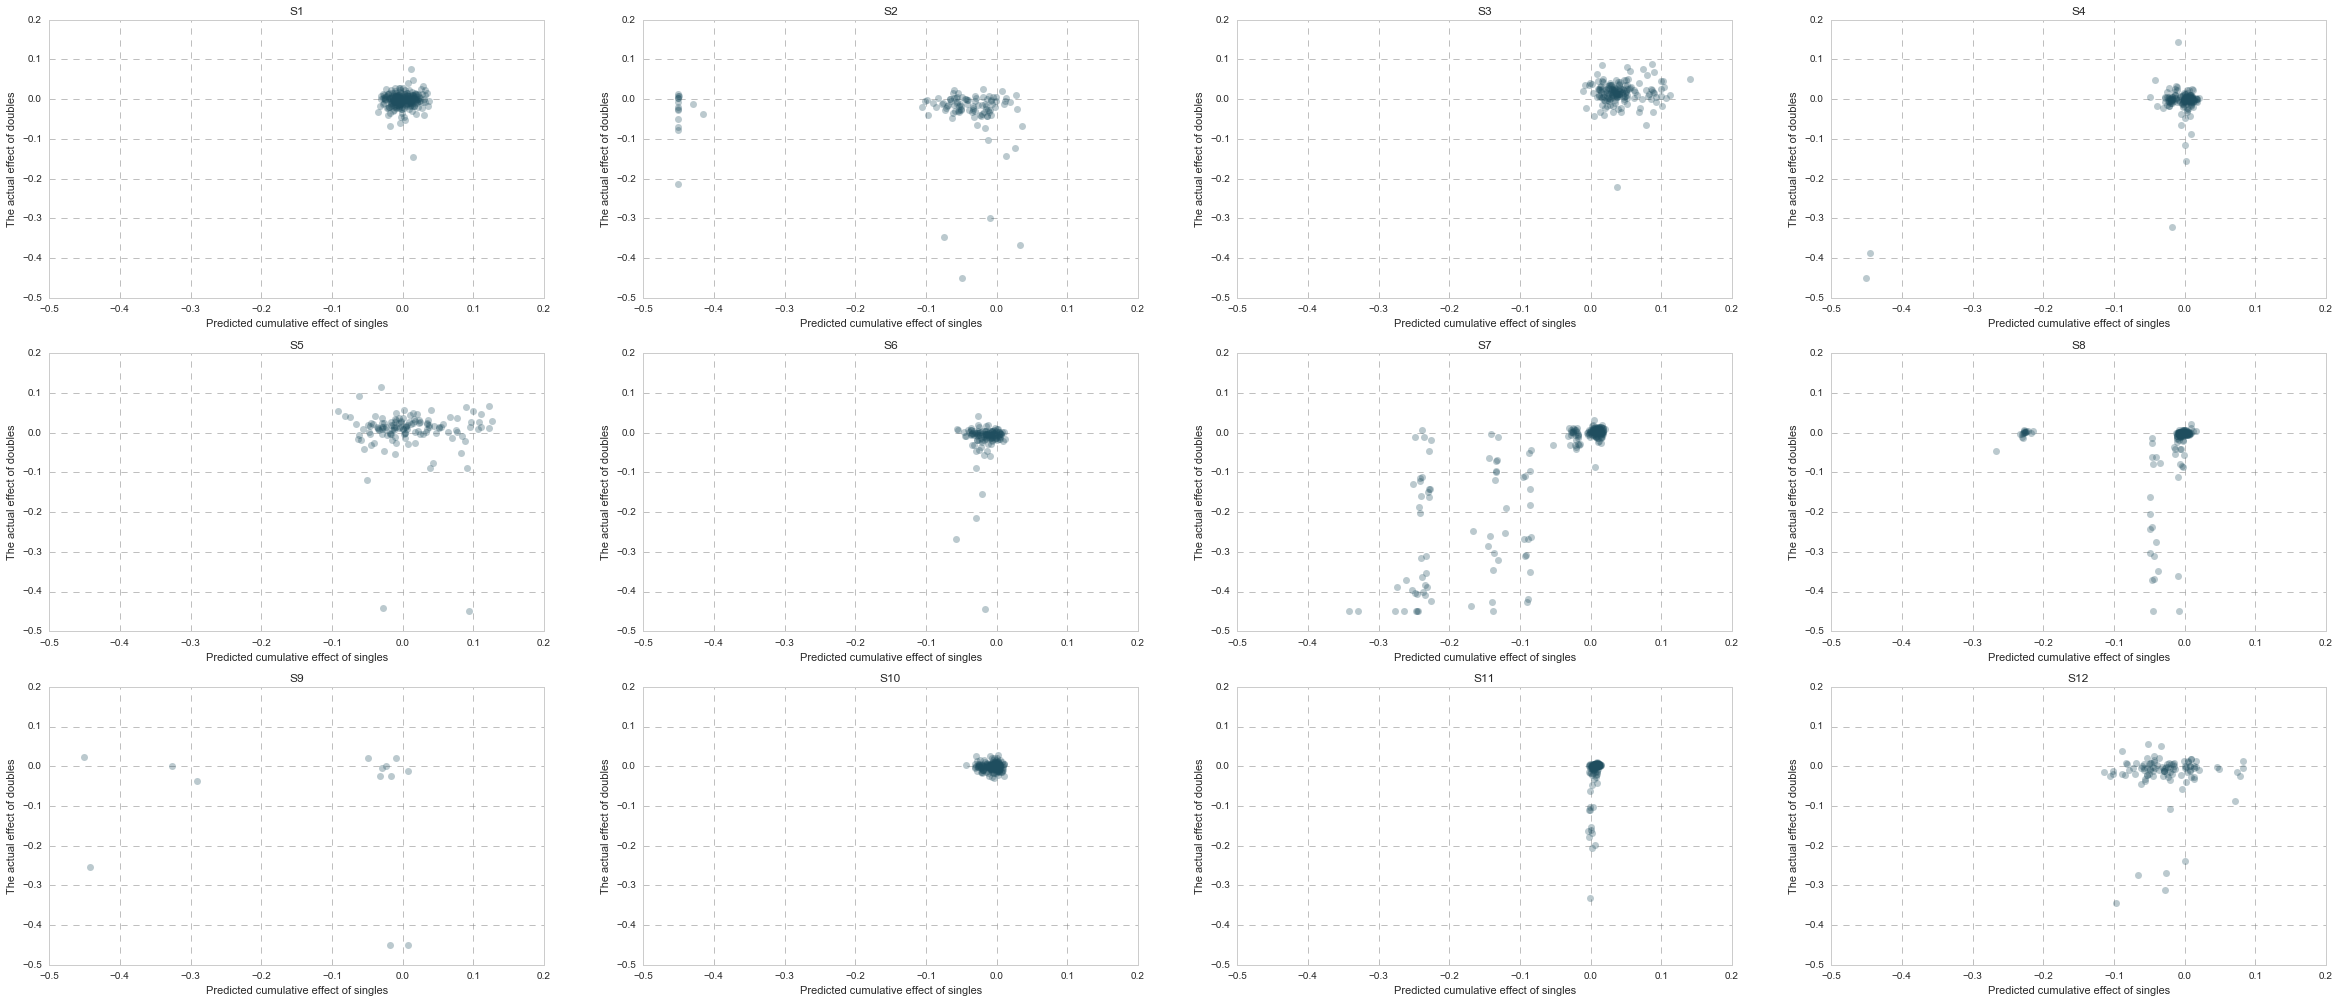

In [41]:
plt.figure(figsize=(4*5+3,3*5))
count=1
for chunk in chunks:
    plt.subplot(3,4,count)
    plt.subplots_adjust(top = 1,right=1.5)
    plt.title(chunk)
    plt.plot(x[chunk], y[chunk], 'o', alpha=0.3, c='#1F4E5F')
    plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
    plt.xlabel('Predicted cumulative effect of singles')
    plt.ylabel('The actual effect of doubles')
    plt.xlim(-0.5,0.2)
    plt.ylim(-0.5,0.2)
    count+=1